In [92]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [252]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [7]:
#check for any duplicates and drop them
df=df.drop_duplicates(keep='first')

In [8]:
df.count()

age         302
sex         302
cp          302
trestbps    302
chol        302
fbs         302
restecg     302
thalach     302
exang       302
oldpeak     302
slope       302
ca          302
thal        302
target      302
dtype: int64

In [10]:
df.shape

(302, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

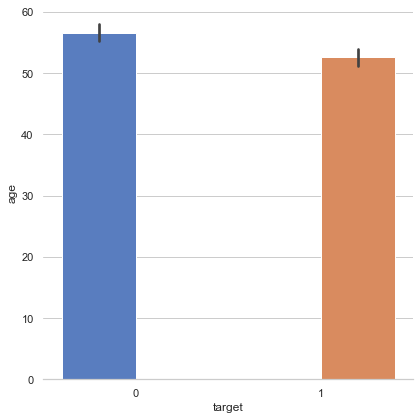

In [41]:
g = sns.catplot(x="target", y="age", hue="target", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("age")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001956CCE4388>,
      dtype=object)

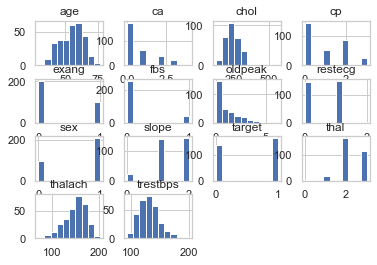

In [42]:
df.hist()

In [43]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

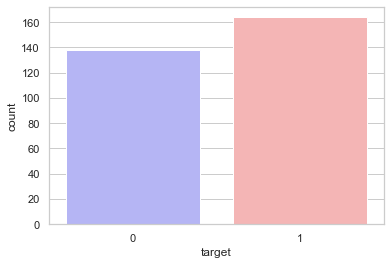

In [47]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

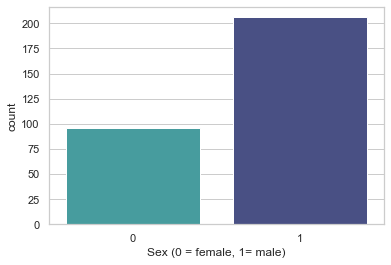

In [48]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

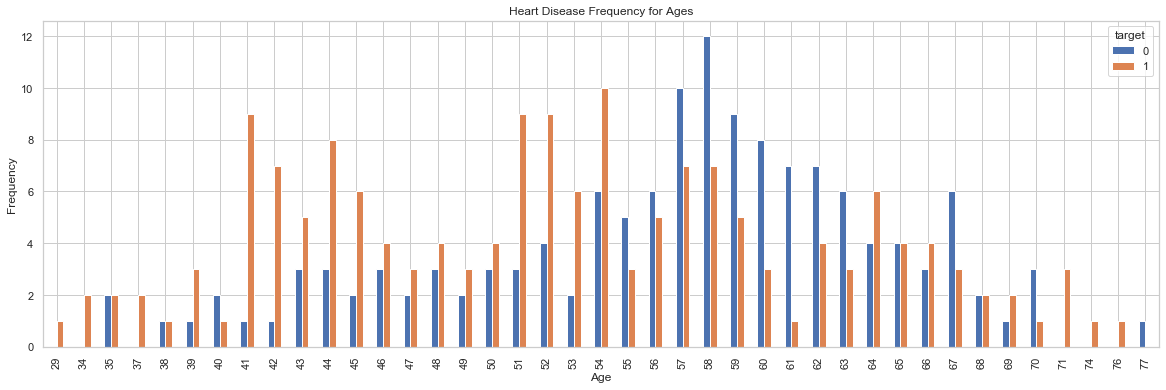

In [49]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

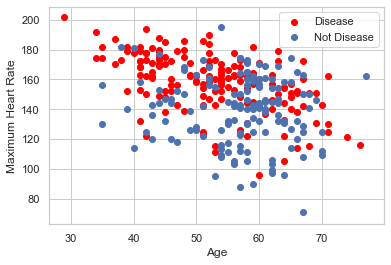

In [50]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

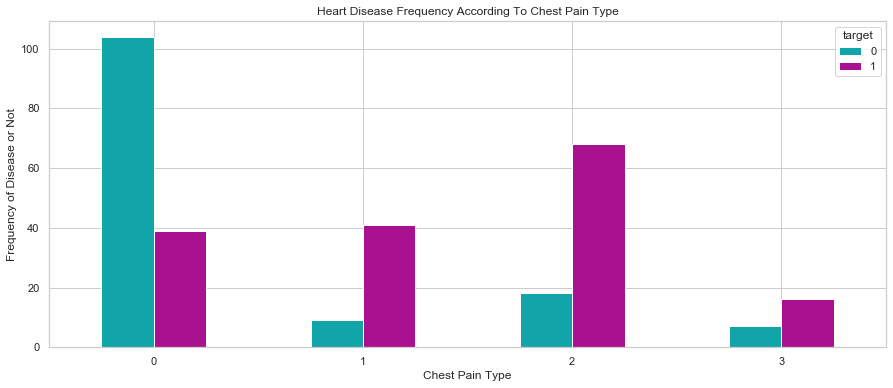

In [51]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

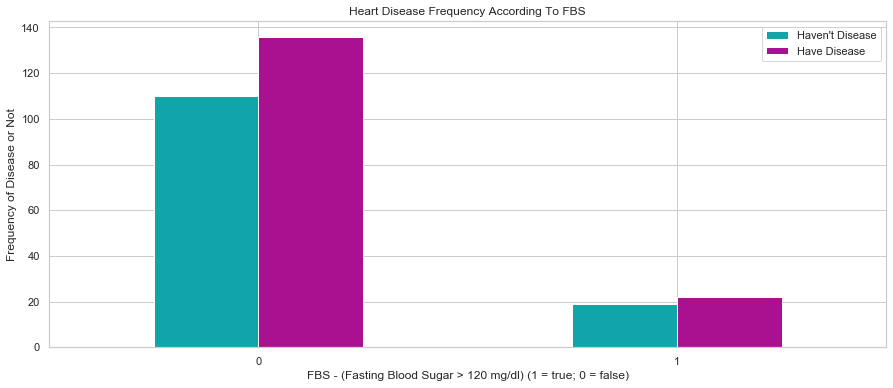

In [485]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

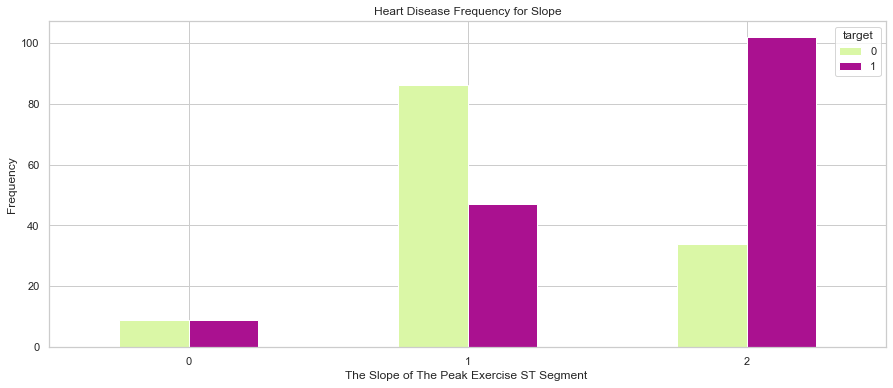

In [486]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#AA1190' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()


In [427]:
daf=df.copy()
df1=df.copy()

Feature Engineering

Dropping the outlier rows with standard deviation

In [428]:
factor = 3
for column in daf:
    upper_lim = daf[column].mean () + daf[column].std () * factor
    lower_lim = daf[column].mean () - daf[column].std () * factor
    daf = daf[(daf[column] < upper_lim) & (daf[column] > lower_lim)]

In [429]:
df=daf.copy()

Min Max Normalization

In [430]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

Dividing dataset into train(70%), dev(20%), test(10%) sets

In [431]:
InputTable= df2.drop([13],axis='columns')
TargetTable=df2.filter([13],axis='columns')
#train=70,dev=20,test=10
x, x_test, y, y_test = train_test_split(InputTable,TargetTable,test_size=0.1,train_size=0.9)
x_train, x_dev, y_train, y_dev = train_test_split(x,y,test_size = 0.22,train_size =0.78)

Decision Tree Classification

In [432]:
DTC = DecisionTreeClassifier()
DTC= DTC.fit(x_train,y_train)
y_pred_train= DTC.predict(x_train)
y_pred_test = DTC.predict(x_test)
y_pred_dev= DTC.predict(x_dev)

In [433]:
print("Accuracy of DTC train:",accuracy_score(y_train, y_pred_train))
print("Precision of DTC train:",average_precision_score(y_train, y_pred_train))
print("Recall of DTC train:",recall_score(y_train, y_pred_train))
print("F1 score of DTC train:",f1_score(y_train, y_pred_train))
print("ROU AUC score of DTC train:",roc_auc_score(y_train, y_pred_train))

Accuracy of DTC train: 1.0
Precision of DTC train: 1.0
Recall of DTC train: 1.0
F1 score of DTC train: 1.0
ROU AUC score of DTC train: 1.0


In [434]:
print("Accuracy of DTC dev:",accuracy_score(y_dev, y_pred_dev))
print("Precision of DTC dev:",average_precision_score(y_dev, y_pred_dev))
print("Recall of DTC dev:",recall_score(y_dev, y_pred_dev))
print("F1 score of DTC dev:",f1_score(y_dev, y_pred_dev))
print("ROU AUC score of DTC dev:",roc_auc_score(y_dev, y_pred_dev))

Accuracy of DTC dev: 0.7894736842105263
Precision of DTC dev: 0.8015948963317384
Recall of DTC dev: 0.8
F1 score of DTC dev: 0.823529411764706
ROU AUC score of DTC dev: 0.7863636363636364


Bias-Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Variance-Variance is the variability of model prediction for a given data point or a value which tells us spread of our data.
Overfitting occurs when the model or the algorithm fits the data too well.  Specifically, overfitting occurs if the model or algorithm shows low bias but high variance.
Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data.  Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough.  Specifically, underfitting occurs if the model or algorithm shows low variance but high bias

In [ ]:
#This model results in overfitting- fitting too well for training set , but not for dev set. 
#this shows low bias and high variance
#to overcome this, let's tune the hyperprameter (max-depth)

In [436]:
# Let's check the error at different depths
train=[]
dev=[]
for i in range(1,10):
    dec = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 5, max_depth=i)
    dec.fit(x_train, y_train)
    train.append(1-metrics.accuracy_score(dec.predict(x_train), y_train))
    dev.append(1-metrics.accuracy_score(dec.predict(x_dev), y_dev))

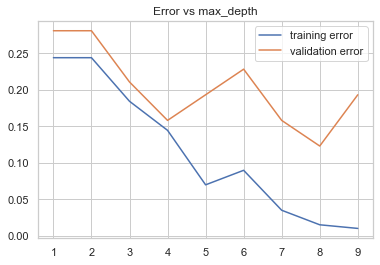

In [437]:
plt.title('Error vs max_depth')
depth=[i for i in range(1,10)]
plt.plot(depth,train,label = 'training error')
plt.plot(depth,dev, label = 'validation error')
plt.legend()

In [ ]:
#Can observer low error at depth 8, lets tune the max_depth to 8

In [438]:
DTC1=DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 5, max_depth=8)
DTC1= DTC1.fit(x_train,y_train)
y_pred_train= DTC1.predict(x_train)
y_pred_test = DTC1.predict(x_test)
y_pred_dev= DTC1.predict(x_dev)

In [439]:
print("Accuracy of DTC train:",accuracy_score(y_train, y_pred_train))
print("Precision of DTC train:",average_precision_score(y_train, y_pred_train))
print("Recall of DTC train:",recall_score(y_train, y_pred_train))
print("F1 score of DTC train:",f1_score(y_train, y_pred_train))
print("ROU AUC score of DTC train:",roc_auc_score(y_train, y_pred_train))

Accuracy of DTC train: 0.9850746268656716
Precision of DTC train: 0.9732142857142857
Recall of DTC train: 1.0
F1 score of DTC train: 0.9864253393665159
ROU AUC score of DTC train: 0.983695652173913


In [440]:
print("Accuracy of DTC dev:",accuracy_score(y_dev, y_pred_dev))
print("Precision of DTC dev:",average_precision_score(y_dev, y_pred_dev))
print("Recall of DTC dev:",recall_score(y_dev, y_pred_dev))
print("F1 score of DTC dev:",f1_score(y_dev, y_pred_dev))
print("ROU AUC score of DTC dev:",roc_auc_score(y_dev, y_pred_dev))

Accuracy of DTC dev: 0.8771929824561403
Precision of DTC dev: 0.8912907268170426
Recall of DTC dev: 0.8571428571428571
F1 score of DTC dev: 0.8955223880597014
ROU AUC score of DTC dev: 0.8831168831168831


Random Forest Classification

In [442]:
clf1 = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 50,random_state=5, max_depth = 5)
clf1.fit(x_train,y_train.values.ravel())
y_pred_train= clf1.predict(x_train)
y_pred_test = clf1.predict(x_test)
y_pred_dev= clf1.predict(x_dev)

In [443]:
print("Accuracy of RFC train:",accuracy_score(y_train, y_pred_train))
print("Precision of RFC train:",average_precision_score(y_train, y_pred_train))
print("Recall of RFC train:",recall_score(y_train, y_pred_train))
print("F1 score of RFC train:",f1_score(y_train, y_pred_train))
print("ROU AUC score of RFC train:",roc_auc_score(y_train, y_pred_train))

Accuracy of RFC train: 0.9402985074626866
Precision of RFC train: 0.9188338002523954
Recall of RFC train: 0.9541284403669725
F1 score of RFC train: 0.9454545454545454
ROU AUC score of RFC train: 0.9390207419226168


In [444]:
print("Accuracy of RFC dev:",accuracy_score(y_dev, y_pred_dev))
print("Precision of RFC dev:",average_precision_score(y_dev, y_pred_dev))
print("Recall of RFC dev:",recall_score(y_dev, y_pred_dev))
print("F1 score of RFC dev:",f1_score(y_dev, y_pred_dev))
print("ROU AUC score of RFC dev:",roc_auc_score(y_dev, y_pred_dev))

Accuracy of RFC dev: 0.8421052631578947
Precision of RFC dev: 0.8440218192540174
Recall of RFC dev: 0.8571428571428571
F1 score of RFC dev: 0.8695652173913043
ROU AUC score of RFC dev: 0.8376623376623377


In [446]:
# Let's check the error at different depths
train=[]
dev=[]
for i in range(1,10):
    rfc = RandomForestClassifier(criterion = 'entropy',max_features = 'log2', random_state = 5, max_depth=i)
    rfc.fit(x_train, y_train.values.ravel())
    train.append(1-metrics.accuracy_score(rfc.predict(x_train), y_train))
    dev.append(1-metrics.accuracy_score(rfc.predict(x_dev), y_dev))

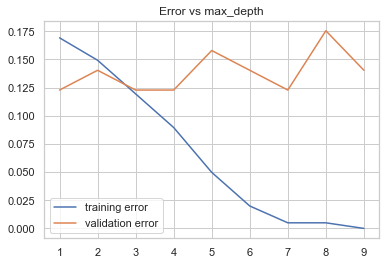

In [447]:
plt.title('Error vs max_depth')
depth=[i for i in range(1,10)]
plt.plot(depth,train,label = 'training error')
plt.plot(depth,dev, label = 'validation error')
plt.legend()

In [ ]:
#Can observer low error at depth 3, lets tune the max_depth to 3

In [449]:
# Let's check the error using n_estimators
train=[]
dev=[]
for i in range(1,250,10):
    rfc = RandomForestClassifier(criterion = 'entropy',max_features = 'log2', max_depth=3,random_state = 5,n_estimators = i)
    rfc.fit(x_train, y_train.values.ravel())
    train.append(1-metrics.accuracy_score(rfc.predict(x_train), y_train))
    dev.append(1-metrics.accuracy_score(rfc.predict(x_dev), y_dev))

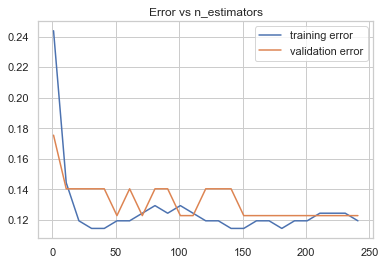

In [450]:
plt.title('Error vs n_estimators')
depth=[i for i in range(1,250,10)]
plt.plot(depth,train,label = 'training error')
plt.plot(depth,dev, label = 'validation error')
plt.legend()

In [ ]:
#Can observer low error, when we use n_estimators as 150

In [451]:
clf1 = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 150,random_state=5, max_depth = 3)
clf1.fit(x_train,y_train.values.ravel())
y_pred_train= clf1.predict(x_train)
y_pred_test = clf1.predict(x_test)
y_pred_dev= clf1.predict(x_dev)

In [452]:
print("Accuracy of RFC train:",accuracy_score(y_train, y_pred_train))
print("Precision of RFC train:",average_precision_score(y_train, y_pred_train))
print("Recall of RFC train:",recall_score(y_train, y_pred_train))
print("F1 score of RFC train:",f1_score(y_train, y_pred_train))
print("ROU AUC score of RFC train:",roc_auc_score(y_train, y_pred_train))

Accuracy of RFC train: 0.8855721393034826
Precision of RFC train: 0.8495403234911872
Recall of RFC train: 0.9174311926605505
F1 score of RFC train: 0.8968609865470852
ROU AUC score of RFC train: 0.8826286398085361


In [453]:
print("Accuracy of RFC dev:",accuracy_score(y_dev, y_pred_dev))
print("Precision of RFC dev:",average_precision_score(y_dev, y_pred_dev))
print("Recall of RFC dev:",recall_score(y_dev, y_pred_dev))
print("F1 score of RFC dev:",f1_score(y_dev, y_pred_dev))
print("ROU AUC score of RFC dev:",roc_auc_score(y_dev, y_pred_dev))

Accuracy of RFC dev: 0.8771929824561403
Precision of RFC dev: 0.8653299916457811
Recall of RFC dev: 0.9142857142857143
F1 score of RFC dev: 0.9014084507042254
ROU AUC score of RFC dev: 0.8662337662337661


Support Vector Machine

In [460]:
from sklearn import svm
svc = svm.SVC(kernel='linear',random_state=5)
svc.fit(x_train, y_train.values.ravel())
y_pred_train= svc.predict(x_train)
y_pred_test = svc.predict(x_test)
y_pred_dev= svc.predict(x_dev)

In [461]:
print("Accuracy of svm train:",accuracy_score(y_train, y_pred_train))
print("Precision of svm train:",average_precision_score(y_train, y_pred_train))
print("Recall of svm train:",recall_score(y_train, y_pred_train))
print("F1 score of svm train:",f1_score(y_train, y_pred_train))
print("ROU AUC score of svm train:",roc_auc_score(y_train, y_pred_train))

Accuracy of svm train: 0.8407960199004975
Precision of svm train: 0.7863970618625431
Recall of svm train: 0.9357798165137615
F1 score of svm train: 0.864406779661017
ROU AUC score of svm train: 0.8320203430394895


In [462]:
print("Accuracy of svm dev:",accuracy_score(y_dev, y_pred_dev))
print("Precision of svm dev:",average_precision_score(y_dev, y_pred_dev))
print("Recall of svm dev:",recall_score(y_dev, y_pred_dev))
print("F1 score of svm dev:",f1_score(y_dev, y_pred_dev))
print("ROU AUC score of svm dev:",roc_auc_score(y_dev, y_pred_dev))

Accuracy of svm dev: 0.8947368421052632
Precision of svm dev: 0.8885499462943072
Recall of svm dev: 0.9142857142857143
F1 score of svm dev: 0.9142857142857143
ROU AUC score of svm dev: 0.888961038961039


KNN

In [465]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train.values.ravel())
y_pred_train= knn.predict(x_train)
y_pred_test = knn.predict(x_test)
y_pred_dev= knn.predict(x_dev)

In [466]:
print("Accuracy of knn train:",accuracy_score(y_train, y_pred_train))
print("Precision of knn train:",average_precision_score(y_train, y_pred_train))
print("Recall of knn train:",recall_score(y_train, y_pred_train))
print("F1 score of knn train:",f1_score(y_train, y_pred_train))
print("ROU AUC score of knn train:",roc_auc_score(y_train, y_pred_train))

Accuracy of knn train: 0.845771144278607
Precision of knn train: 0.8200568259619335
Recall of knn train: 0.8348623853211009
F1 score of knn train: 0.8544600938967136
ROU AUC score of knn train: 0.846779018747507


In [467]:
print("Accuracy of knn dev:",accuracy_score(y_dev, y_pred_dev))
print("Precision of knn dev:",average_precision_score(y_dev, y_pred_dev))
print("Recall of knn dev:",recall_score(y_dev, y_pred_dev))
print("F1 score of knn dev:",f1_score(y_dev, y_pred_dev))
print("ROU AUC score of knn dev:",roc_auc_score(y_dev, y_pred_dev))

Accuracy of knn dev: 0.8596491228070176
Precision of knn dev: 0.8669400774663932
Recall of knn dev: 0.8571428571428571
F1 score of knn dev: 0.8823529411764706
ROU AUC score of knn dev: 0.8603896103896104


Logistic Regression

In [469]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train.values.ravel())
y_pred_train= logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)
y_pred_dev= logreg.predict(x_dev)

In [470]:
print("Accuracy of LR train:",accuracy_score(y_train, y_pred_train))
print("Precision of LR train:",average_precision_score(y_train, y_pred_train))
print("Recall of LR train:",recall_score(y_train, y_pred_train))
print("F1 score of LR train:",f1_score(y_train, y_pred_train))
print("ROU AUC score of LR train:",roc_auc_score(y_train, y_pred_train))

Accuracy of LR train: 0.8308457711442786
Precision of LR train: 0.7829089445486194
Recall of LR train: 0.8990825688073395
F1 score of LR train: 0.8521739130434783
ROU AUC score of LR train: 0.8245412844036698


In [471]:
print("Accuracy of LR dev:",accuracy_score(y_dev, y_pred_dev))
print("Precision of LR dev:",average_precision_score(y_dev, y_pred_dev))
print("Recall of LR dev:",recall_score(y_dev, y_pred_dev))
print("F1 score of LR dev:",f1_score(y_dev, y_pred_dev))
print("ROU AUC score of LR dev:",roc_auc_score(y_dev, y_pred_dev))

Accuracy of LR dev: 0.8947368421052632
Precision of LR dev: 0.8885499462943072
Recall of LR dev: 0.9142857142857143
F1 score of LR dev: 0.9142857142857143
ROU AUC score of LR dev: 0.888961038961039


In [484]:
# Let's evaluate the models using the test set
models = ['logreg', 'svc','knn','clf1','DTC1']
print('{:<18s}{:>15s}{:>15s}{:>15s}{:>15s}{:>15s}'.format("Model","Accuracy","Precision","Recall","F1 score","ROC AUC",))
print()
for i in models:
    y_pred = eval(i).predict(x_test)
    print('{:<18s}{:>15.2f}{:>15.2f}{:>15.2f}{:>15.2f}{:>15.2f}'.
          format(i,
                 metrics.accuracy_score(y_test,y_pred),
                 metrics.precision_score(y_test,y_pred),
                 metrics.recall_score(y_test,y_pred),
                 metrics.roc_auc_score(y_test, y_pred),
                 metrics.f1_score(y_test,y_pred)))

Model                    Accuracy      Precision         Recall       F1 score        ROC AUC

logreg                       0.93           0.88           1.00           0.93           0.93
svc                          0.90           0.82           1.00           0.90           0.90
knn                          0.90           0.82           1.00           0.90           0.90
clf1                         0.90           0.87           0.93           0.90           0.90
DTC1                         0.86           0.86           0.86           0.86           0.86


Confusion Matrix

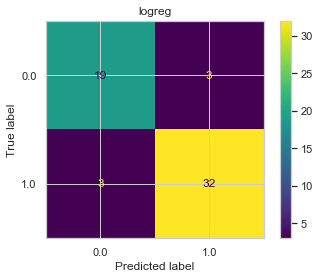

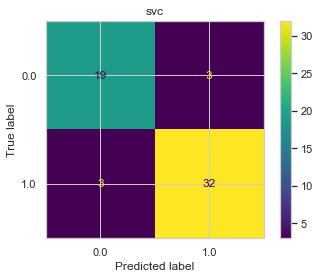

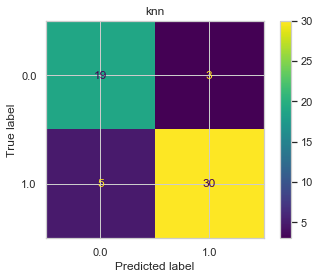

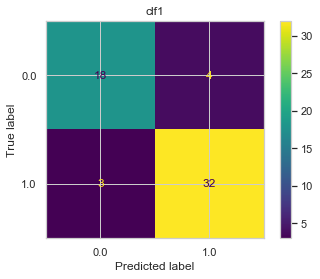

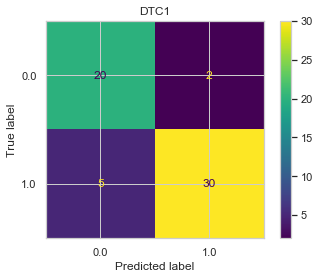

In [477]:
#dev dataset
for i in models:
    plot_confusion_matrix(eval(i),x_dev, y_dev)
    plt.title(i)

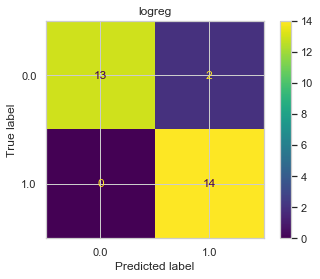

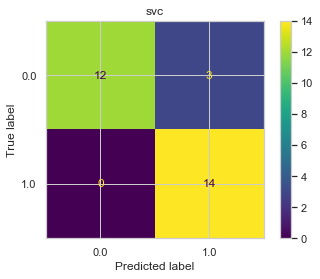

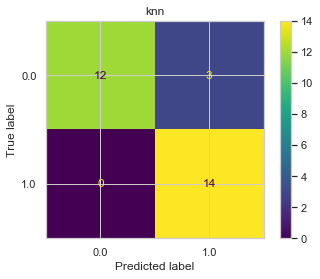

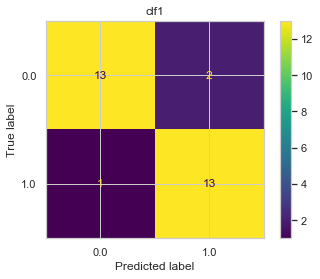

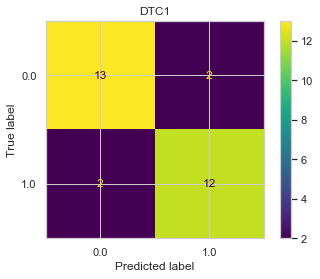

In [476]:
#test dataset
from sklearn.metrics import plot_confusion_matrix
for i in models:
    plot_confusion_matrix(eval(i),x_test, y_test)
    plt.title(i)